In [18]:
# Import libraries
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import pandas as pd

data = pd.read_csv(
    "SMSSpamCollection",
    sep='\t',
    header=None,
    names=['label', 'text']
)

print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [20]:
# Convert labels to binary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [21]:
print(data.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [22]:

# Text preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    return ' '.join(text)

data['text'] = data['text'].apply(clean_text)

In [23]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['text'])
y = data['label']

In [24]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [25]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

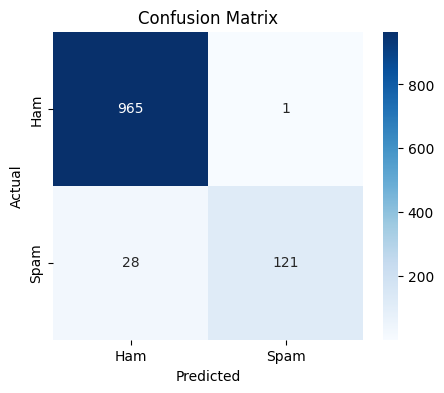

In [29]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Testing

In [30]:
def predict_message(message):
    # Clean the input text
    cleaned = clean_text(message)

    # Convert text to TF-IDF (IMPORTANT)
    vectorized = tfidf.transform([cleaned])

    # Predict
    prediction = model.predict(vectorized)[0]

    return "SPAM" if prediction == 1 else "HAM"


In [32]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [33]:
model.predict(X)

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
def predict_message(message, threshold=0.3):
    cleaned = clean_text(message)
    vectorized = tfidf.transform([cleaned])

    spam_prob = model.predict_proba(vectorized)[0][1]

    return "SPAM" if spam_prob >= threshold else "HAM", spam_prob


In [35]:
test_messages = [
    "Congratulations! You won a free ticket. Call now!",
    "Hey, are we meeting for lunch today?",
    "Urgent! Your account has been suspended. Click the link."
]

for msg in test_messages:
    print(f"Message: {msg}")
    print("Prediction:", predict_message(msg))
    print("-" * 50)


Message: Congratulations! You won a free ticket. Call now!
Prediction: ('SPAM', np.float64(0.7527527057621818))
--------------------------------------------------
Message: Hey, are we meeting for lunch today?
Prediction: ('HAM', np.float64(0.03578025641253473))
--------------------------------------------------
Message: Urgent! Your account has been suspended. Click the link.
Prediction: ('SPAM', np.float64(0.5784060830868973))
--------------------------------------------------
